### We read in the data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, metrics
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np


day_hour_count = pd.read_csv("bikeshare_hour_count.csv")
day_hour_count.dropna(inplace=True)
day_hour_count

,hour,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,0.0,21.0,34.0,43.0,47.0,51.0,89.0,106.0
1,0.1,39.0,22.0,27.0,37.0,56.0,87.0,100.0
2,0.2,31.0,24.0,26.0,42.0,50.0,98.0,77.0
3,0.3,26.0,27.0,25.0,29.0,52.0,99.0,87.0
4,0.4,19.0,24.0,29.0,29.0,50.0,98.0,69.0
...,...,...,...,...,...,...,...,...
235,23.5,36.0,65.0,60.0,94.0,80.0,93.0,28.0
236,23.6,37.0,61.0,66.0,100.0,81.0,95.0,28.0
237,23.7,30.0,42.0,49.0,80.0,101.0,105.0,27.0
238,23.8,33.0,52.0,47.0,79.0,91.0,93.0,24.0


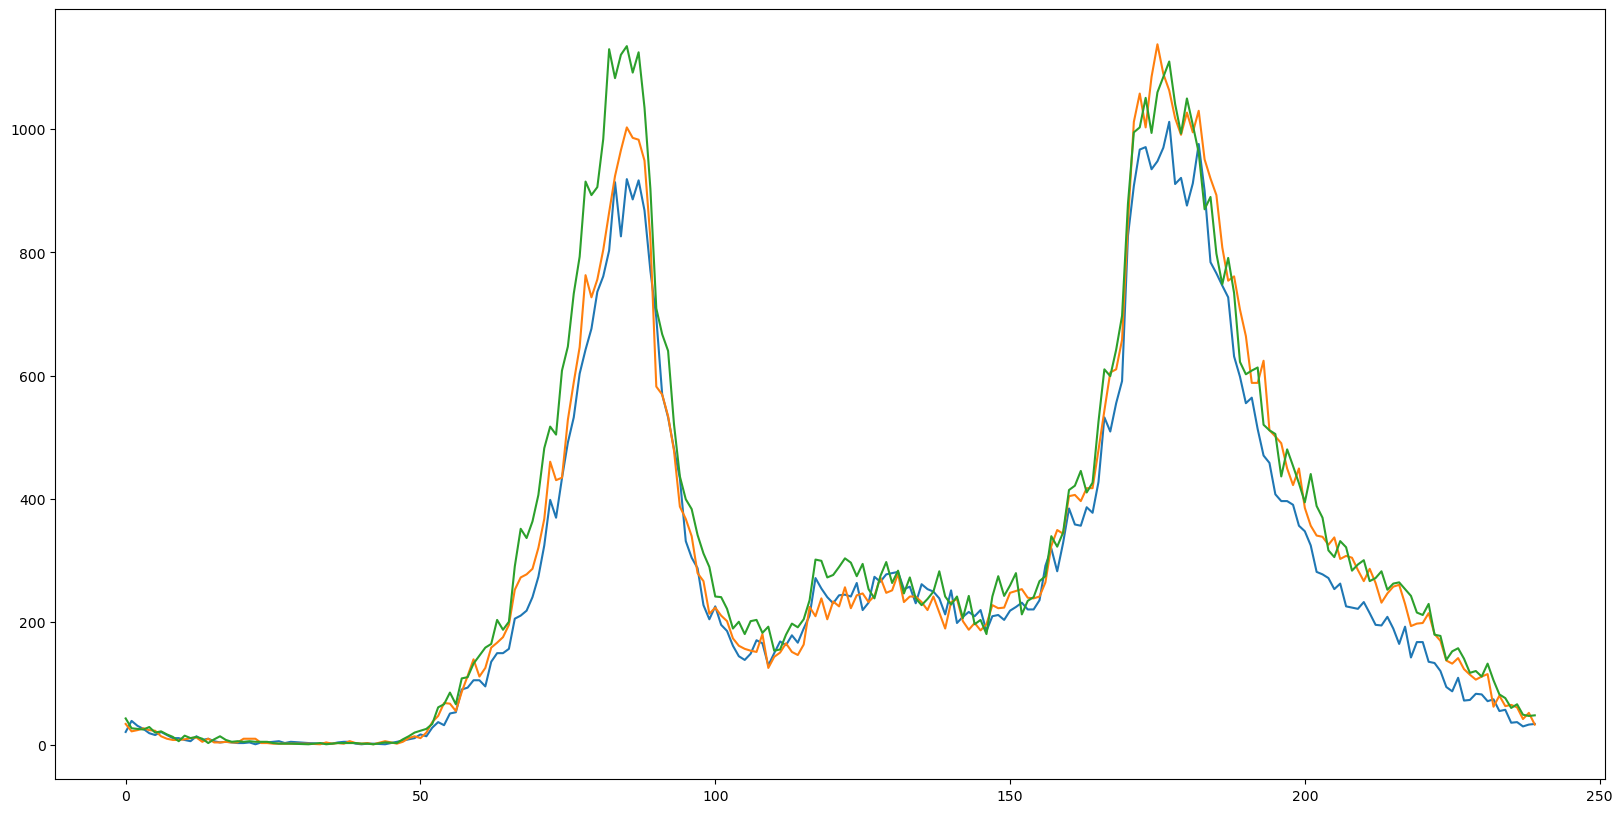

In [5]:
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count["monday"])
plt.plot(day_hour_count.index, day_hour_count["tuesday"])
plt.plot(day_hour_count.index, day_hour_count["wednesday"])

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

# 1. Using the **`day_hour_count`** dataframe create 4 dataframes `monday`, `tuesday`, `saturday` and `sunday` that represent the data for those days. (hint: Monday is day=0)

In [8]:
monday = day_hour_count[["hour","monday"]].copy()

In [10]:
monday

,hour,monday
0,0.0,21.0
1,0.1,39.0
2,0.2,31.0
3,0.3,26.0
4,0.4,19.0
...,...,...
235,23.5,36.0
236,23.6,37.0
237,23.7,30.0
238,23.8,33.0


In [12]:
tuesday = day_hour_count[["hour", "tuesday"]].copy()

In [14]:
tuesday

,hour,tuesday
0,0.0,34.0
1,0.1,22.0
2,0.2,24.0
3,0.3,27.0
4,0.4,24.0
...,...,...
235,23.5,65.0
236,23.6,61.0
237,23.7,42.0
238,23.8,52.0


In [16]:
saturday = day_hour_count[["hour", "saturday"]].copy()

In [18]:
saturday

,hour,saturday
0,0.0,89.0
1,0.1,87.0
2,0.2,98.0
3,0.3,99.0
4,0.4,98.0
...,...,...
235,23.5,93.0
236,23.6,95.0
237,23.7,105.0
238,23.8,93.0


In [20]:
sunday = day_hour_count[["hour", "sunday"]].copy()

In [22]:
sunday

,hour,sunday
0,0.0,106.0
1,0.1,100.0
2,0.2,77.0
3,0.3,87.0
4,0.4,69.0
...,...,...
235,23.5,28.0
236,23.6,28.0
237,23.7,27.0
238,23.8,24.0



## 2a. Create 3 models fit to (`x=hour`, `y=monday`)  with varying polynomial degrees ( choose from `n=5,15,20`). (Repeat for `saturday` below)

## Plot all the results for each polynomial.

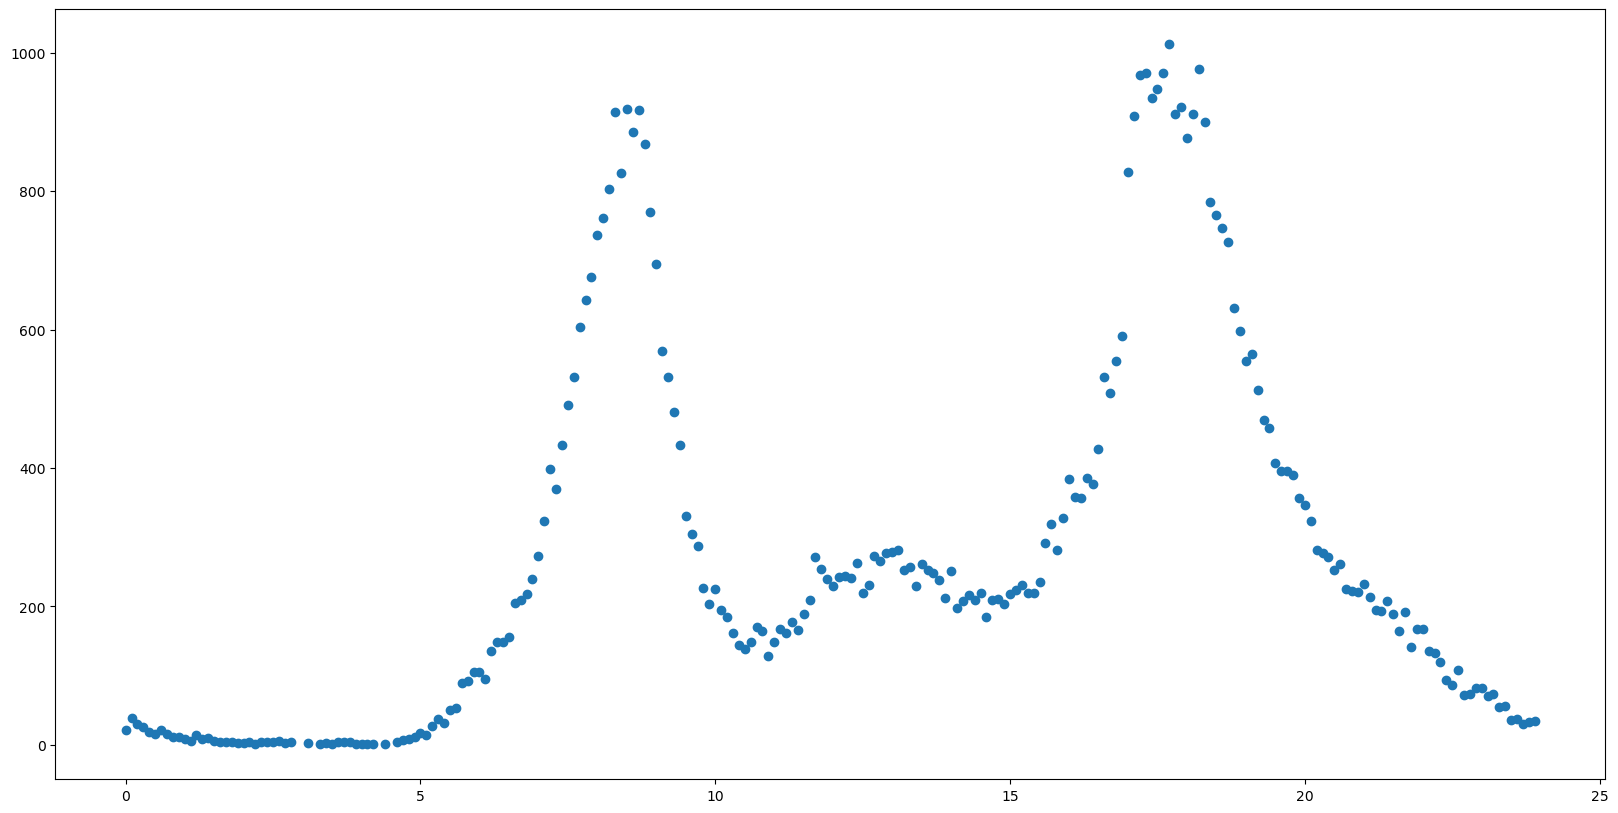

In [25]:
n = 50
x = monday['hour'].values
y = monday['monday'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)

In [27]:
linear = linear_model.LinearRegression()
linear.fit(x, y)
linear.coef_, linear.intercept_

(array([[12.67240265]]), array([125.0952562]))

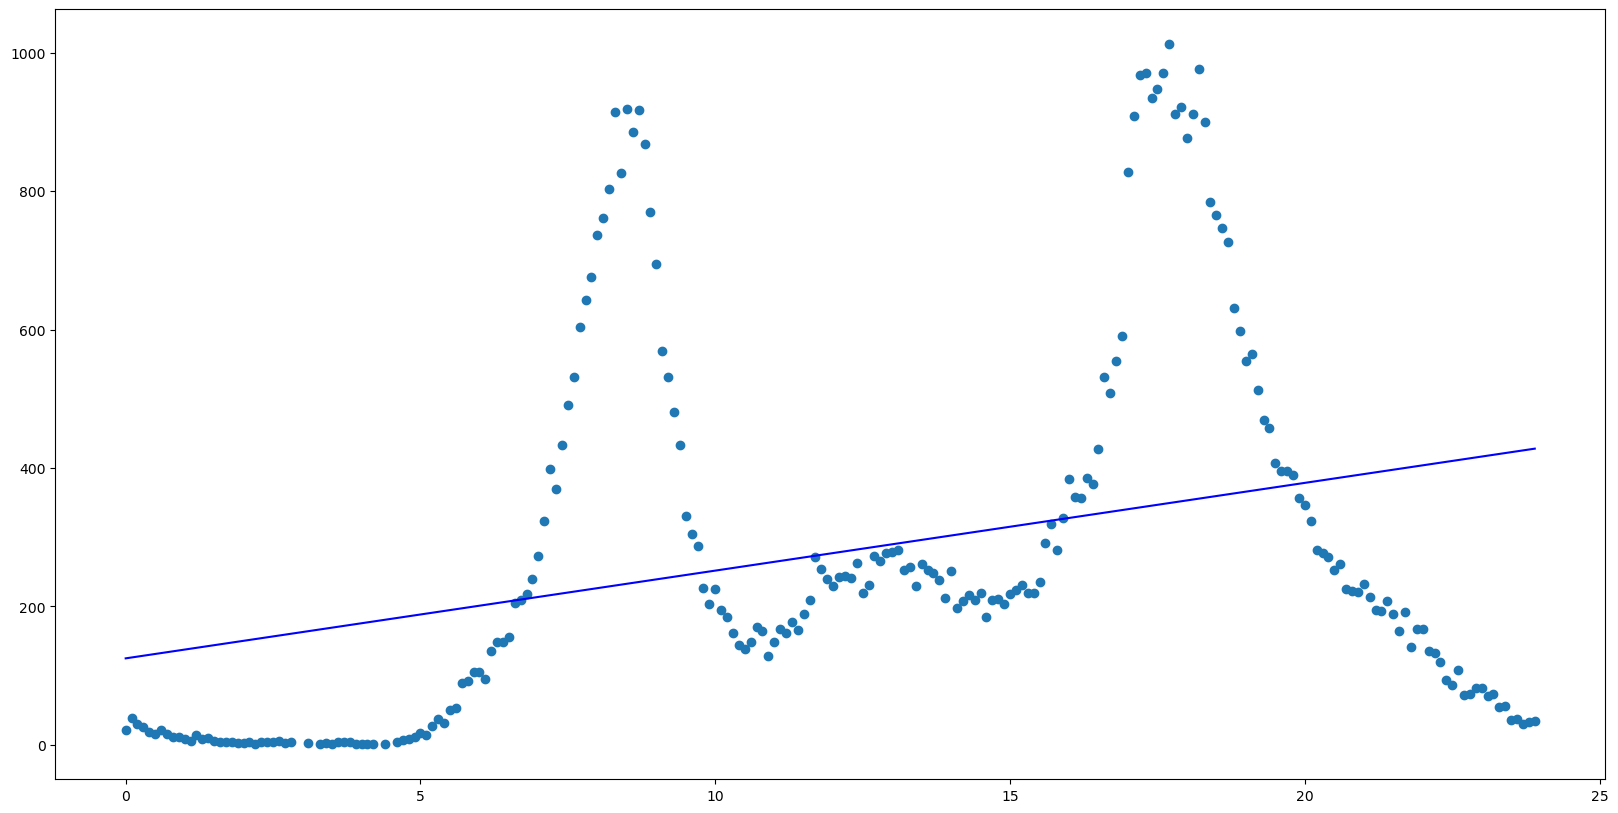

In [29]:
plt.scatter(x, y)
plt.plot(x, linear.predict(x), c='b')

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly5 = PolynomialFeatures(degree=5)
poly15 = PolynomialFeatures(degree=15)
poly20 = PolynomialFeatures(degree=20)
x_5 = poly5.fit_transform(x)
x_15 = poly15.fit_transform(x)
x_20 = poly20.fit_transform(x)

In [33]:
x_5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, 1.00000000e-03,
        1.00000000e-04, 1.00000000e-05],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, 1.33120530e+04,
        3.15495656e+05, 7.47724705e+06],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, 1.34812720e+04,
        3.20854274e+05, 7.63633171e+06],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, 1.36519190e+04,
        3.26280864e+05, 7.79811265e+06]])

In [35]:
x_15

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-13, 1.00000000e-14, 1.00000000e-15],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        8.19200000e-10, 1.63840000e-10, 3.27680000e-11],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        7.44266546e+17, 1.76391171e+19, 4.18047076e+20],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        7.86140991e+17, 1.87101556e+19, 4.45301703e+20],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        8.30180852e+17, 1.98413224e+19, 4.74207605e+20]])

In [37]:
x_20

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-18, 1.00000000e-19, 1.00000000e-20],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        2.62144000e-13, 5.24288000e-14, 1.04857600e-14],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        5.56506483e+24, 1.31892037e+26, 3.12584127e+27],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        6.00323338e+24, 1.42876954e+26, 3.40047151e+27],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        6.47384381e+24, 1.54724867e+26, 3.69792432e+27]])

In [39]:
linear5 = linear_model.LinearRegression()
linear5.fit(x_5, y)
(linear5.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -9.38648794e+01,  4.70261167e+01,
         -5.96385814e+00,  3.08540510e-01, -5.66580989e-03]]),
 array([125.0952562]))

In [41]:
linear15 = linear_model.LinearRegression()
linear15.fit(x_15, y)
(linear15.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -7.04495788e-06,  1.29210404e-07,
          9.14244302e-07,  5.78971350e-06,  3.21984520e-05,
          1.49237087e-04,  5.14176945e-04,  9.56557102e-04,
         -3.93334038e-04,  6.34757457e-05, -5.53231200e-06,
          2.84601443e-07, -8.68037720e-09,  1.45683149e-10,
         -1.03944975e-12]]),
 array([125.0952562]))

In [43]:
linear20 = linear_model.LinearRegression()
linear20.fit(x_20, y)
(linear20.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -2.33430060e-14, -2.45423168e-17,
         -3.34582991e-20, -7.67880219e-21, -8.96294071e-20,
         -9.80954003e-19, -1.02698825e-17, -1.01930252e-16,
         -9.45645170e-16, -8.02783400e-15, -6.03272724e-14,
         -3.79432563e-13, -1.78973295e-12, -4.72011008e-12,
          1.29456318e-12, -1.37271109e-13,  7.36226418e-15,
         -2.08427122e-16,  2.85648117e-18, -1.34792031e-20]]),
 array([125.0952562]))

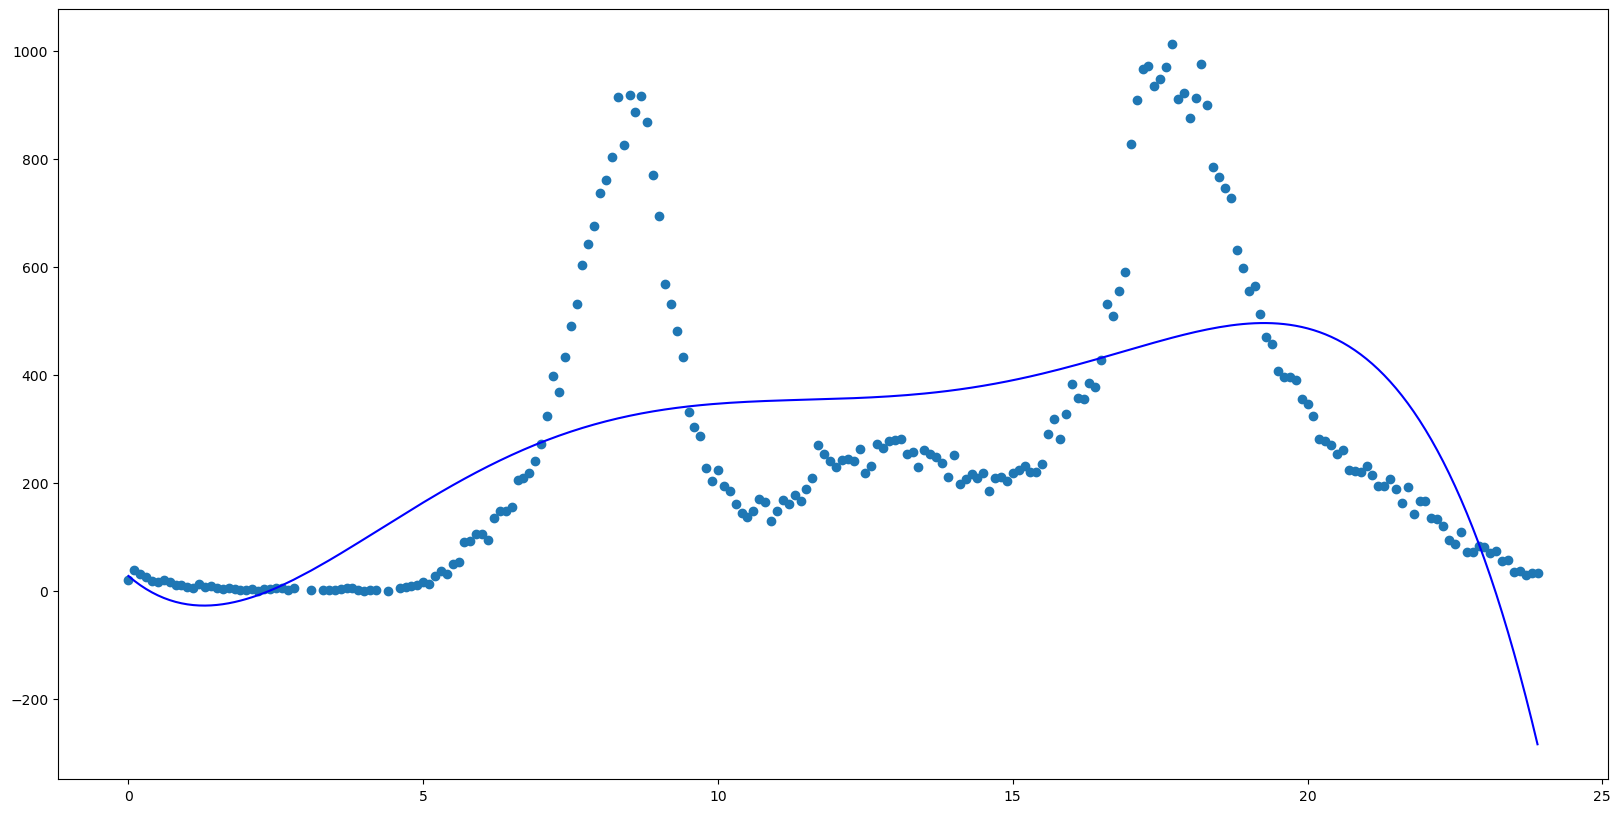

In [45]:
plt.scatter(x, y)
plt.plot(x, linear5.predict(x_5), c='b')

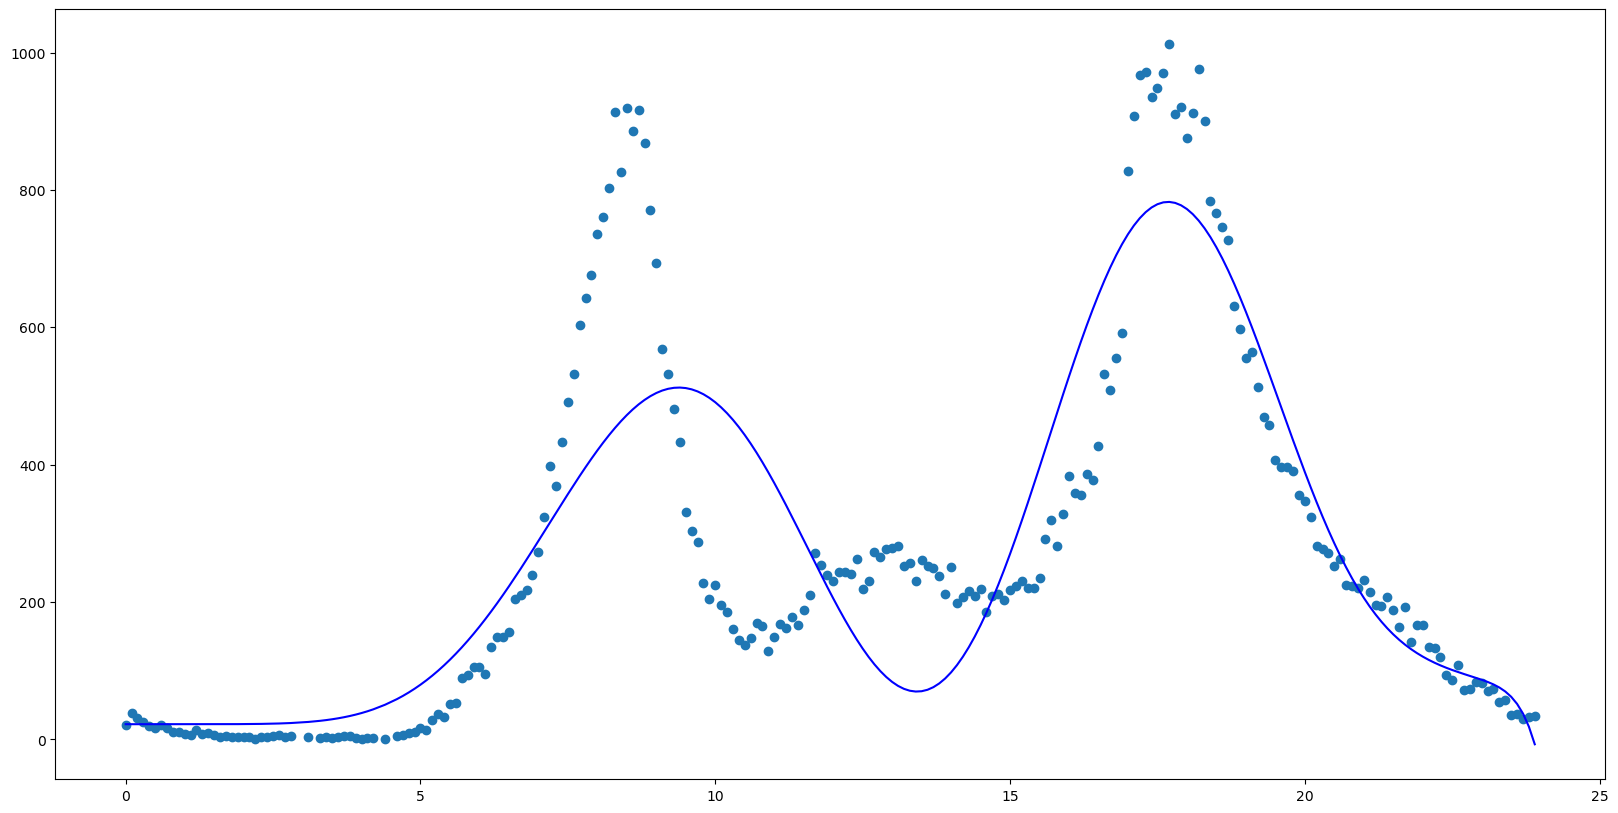

In [47]:
plt.scatter(x, y)
plt.plot(x, linear15.predict(x_15), c='b')

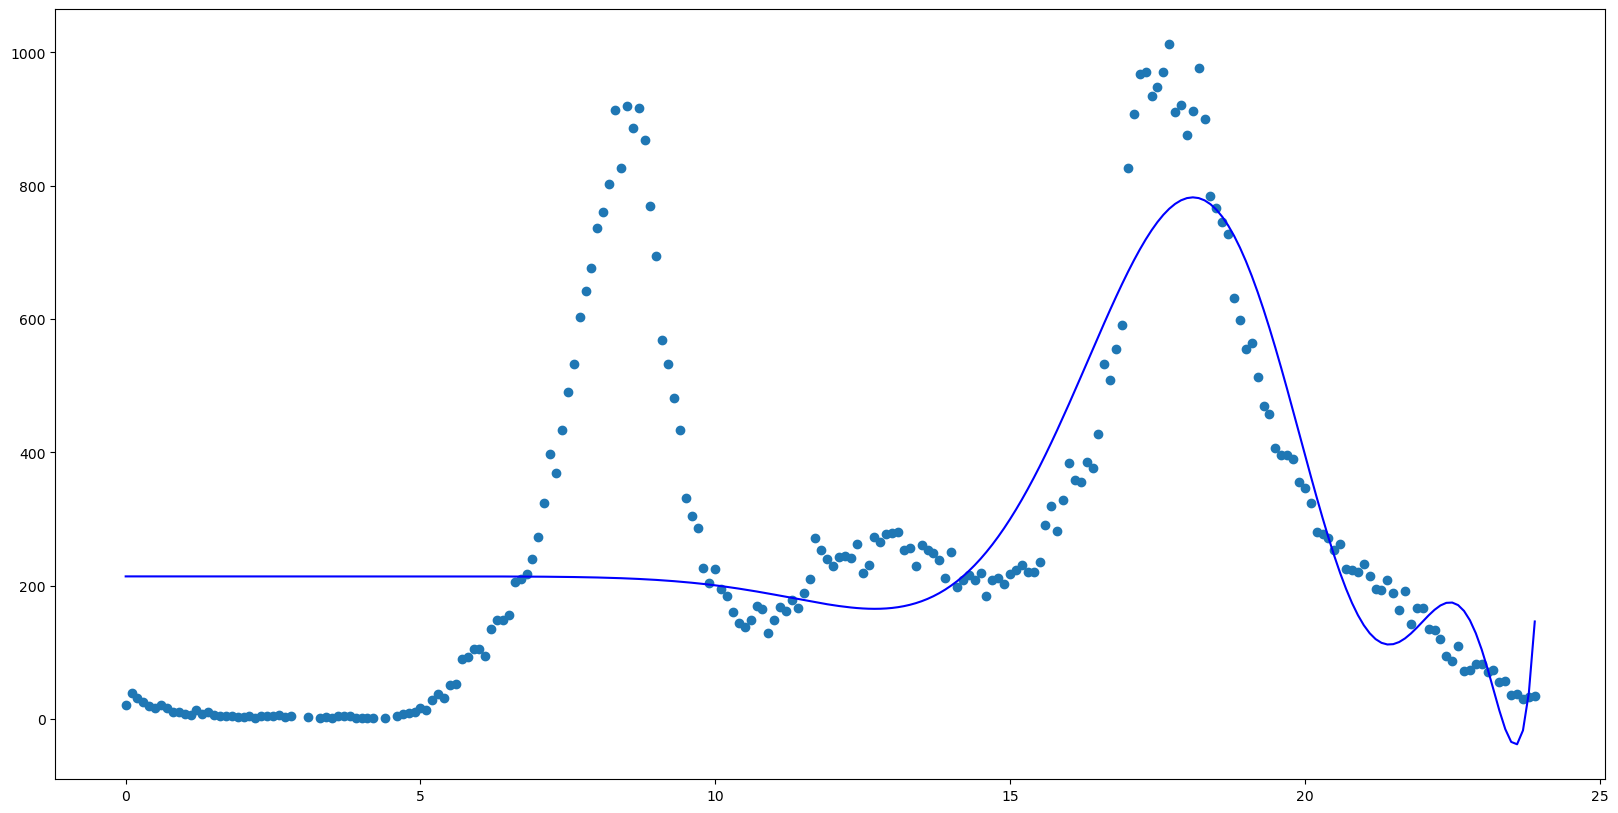

In [49]:
plt.scatter(x, y)
plt.plot(x, linear20.predict(x_20), c='b')

## 2b. Repeat `2a` for `saturday`

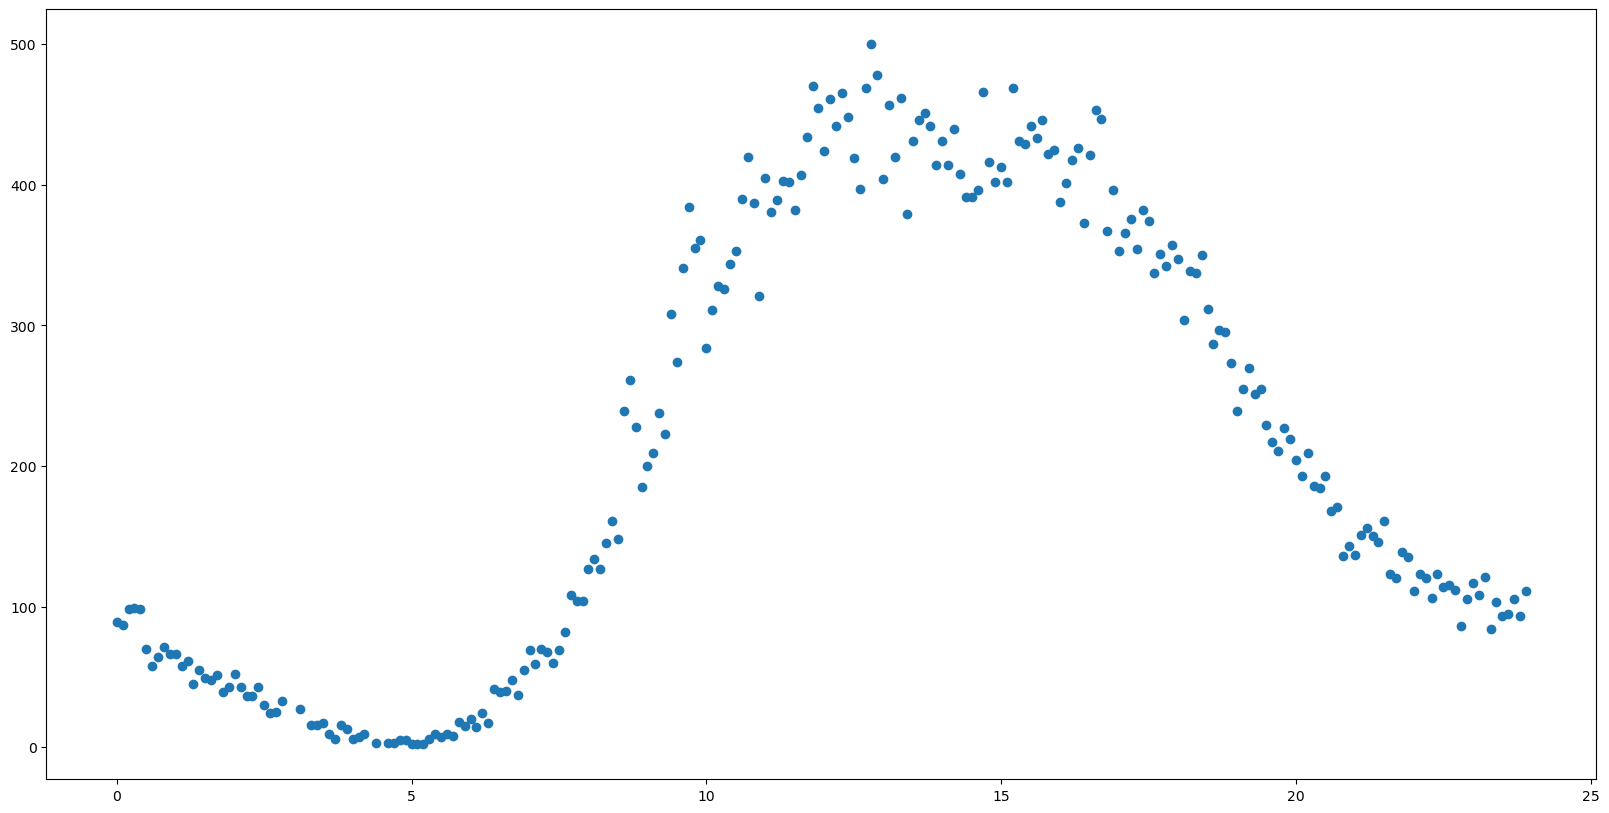

In [52]:
n = 50
x = saturday['hour'].values
y = saturday['saturday'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

plt.scatter(x, y)

In [54]:
linear = linear_model.LinearRegression()
linear.fit(x, y)
linear.coef_, linear.intercept_

(array([[9.71309939]]), array([99.50083162]))

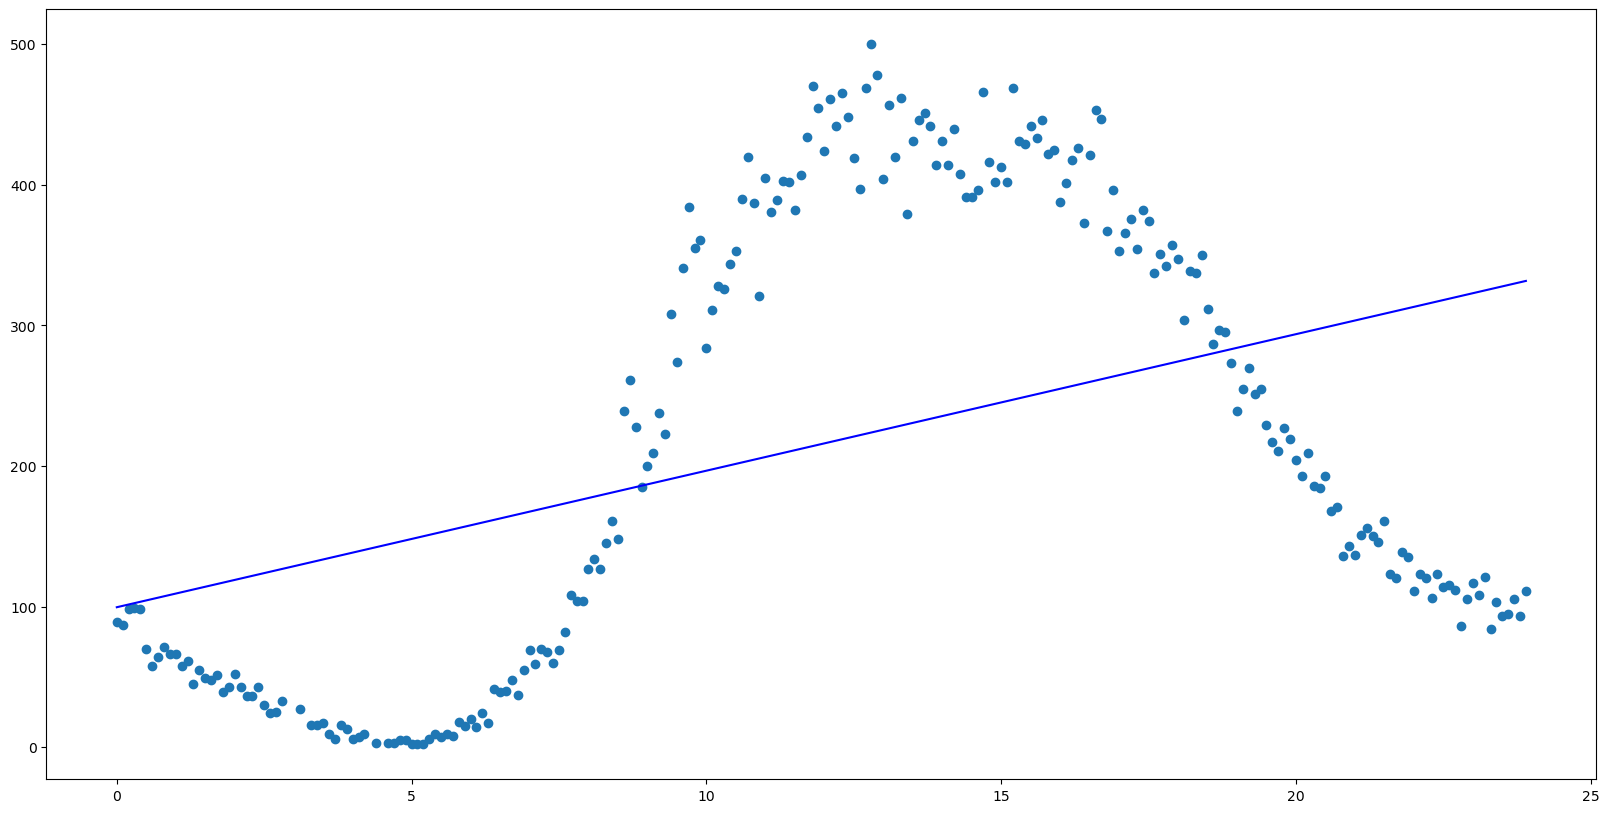

In [56]:
plt.scatter(x, y)
plt.plot(x, linear.predict(x), c='b')

In [58]:
from sklearn.preprocessing import PolynomialFeatures
poly5 = PolynomialFeatures(degree=5)
poly15 = PolynomialFeatures(degree=15)
poly20 = PolynomialFeatures(degree=20)
x_5 = poly5.fit_transform(x)
x_15 = poly15.fit_transform(x)
x_20 = poly20.fit_transform(x)

In [60]:
x_5

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, 1.00000000e-03,
        1.00000000e-04, 1.00000000e-05],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, 1.33120530e+04,
        3.15495656e+05, 7.47724705e+06],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, 1.34812720e+04,
        3.20854274e+05, 7.63633171e+06],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, 1.36519190e+04,
        3.26280864e+05, 7.79811265e+06]])

In [62]:
x_15

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-13, 1.00000000e-14, 1.00000000e-15],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        8.19200000e-10, 1.63840000e-10, 3.27680000e-11],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        7.44266546e+17, 1.76391171e+19, 4.18047076e+20],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        7.86140991e+17, 1.87101556e+19, 4.45301703e+20],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        8.30180852e+17, 1.98413224e+19, 4.74207605e+20]])

In [64]:
x_20

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e-01, 1.00000000e-02, ...,
        1.00000000e-18, 1.00000000e-19, 1.00000000e-20],
       [1.00000000e+00, 2.00000000e-01, 4.00000000e-02, ...,
        2.62144000e-13, 5.24288000e-14, 1.04857600e-14],
       ...,
       [1.00000000e+00, 2.37000000e+01, 5.61690000e+02, ...,
        5.56506483e+24, 1.31892037e+26, 3.12584127e+27],
       [1.00000000e+00, 2.38000000e+01, 5.66440000e+02, ...,
        6.00323338e+24, 1.42876954e+26, 3.40047151e+27],
       [1.00000000e+00, 2.39000000e+01, 5.71210000e+02, ...,
        6.47384381e+24, 1.54724867e+26, 3.69792432e+27]])

In [66]:
linear5 = linear_model.LinearRegression()
linear5.fit(x_5, y)
(linear5.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -8.05769578e+01,  9.76092944e+00,
          6.67872455e-01, -8.92147403e-02,  2.09670715e-03]]),
 array([99.50083162]))

In [68]:
linear15 = linear_model.LinearRegression()
linear15.fit(x_15, y)
(linear15.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -3.66796019e-07,  6.79559243e-09,
          4.81330912e-08,  3.05804184e-07,  1.70896551e-06,
          7.98580500e-06,  2.79745560e-05,  5.48677912e-05,
         -8.57328067e-06, -4.64495197e-07,  1.86313163e-07,
         -1.66660632e-08,  7.17598818e-10, -1.55068939e-11,
          1.35291916e-13]]),
 array([99.50083162]))

In [70]:
linear20 = linear_model.LinearRegression()
linear20.fit(x_20, y)
(linear20.coef_, linear.intercept_)

(array([[ 0.00000000e+00,  1.43767566e-13,  1.51224794e-16,
          2.06434812e-19,  4.72830554e-20,  5.51872018e-19,
          6.03935240e-18,  6.32192726e-17,  6.27354222e-16,
          5.81887065e-15,  4.93821049e-14,  3.70915637e-13,
          2.33100911e-12,  1.09769775e-11,  2.88002864e-11,
         -8.88446800e-12,  1.09166592e-12, -7.06632697e-14,
          2.55717452e-15, -4.91511185e-17,  3.92342017e-19]]),
 array([99.50083162]))

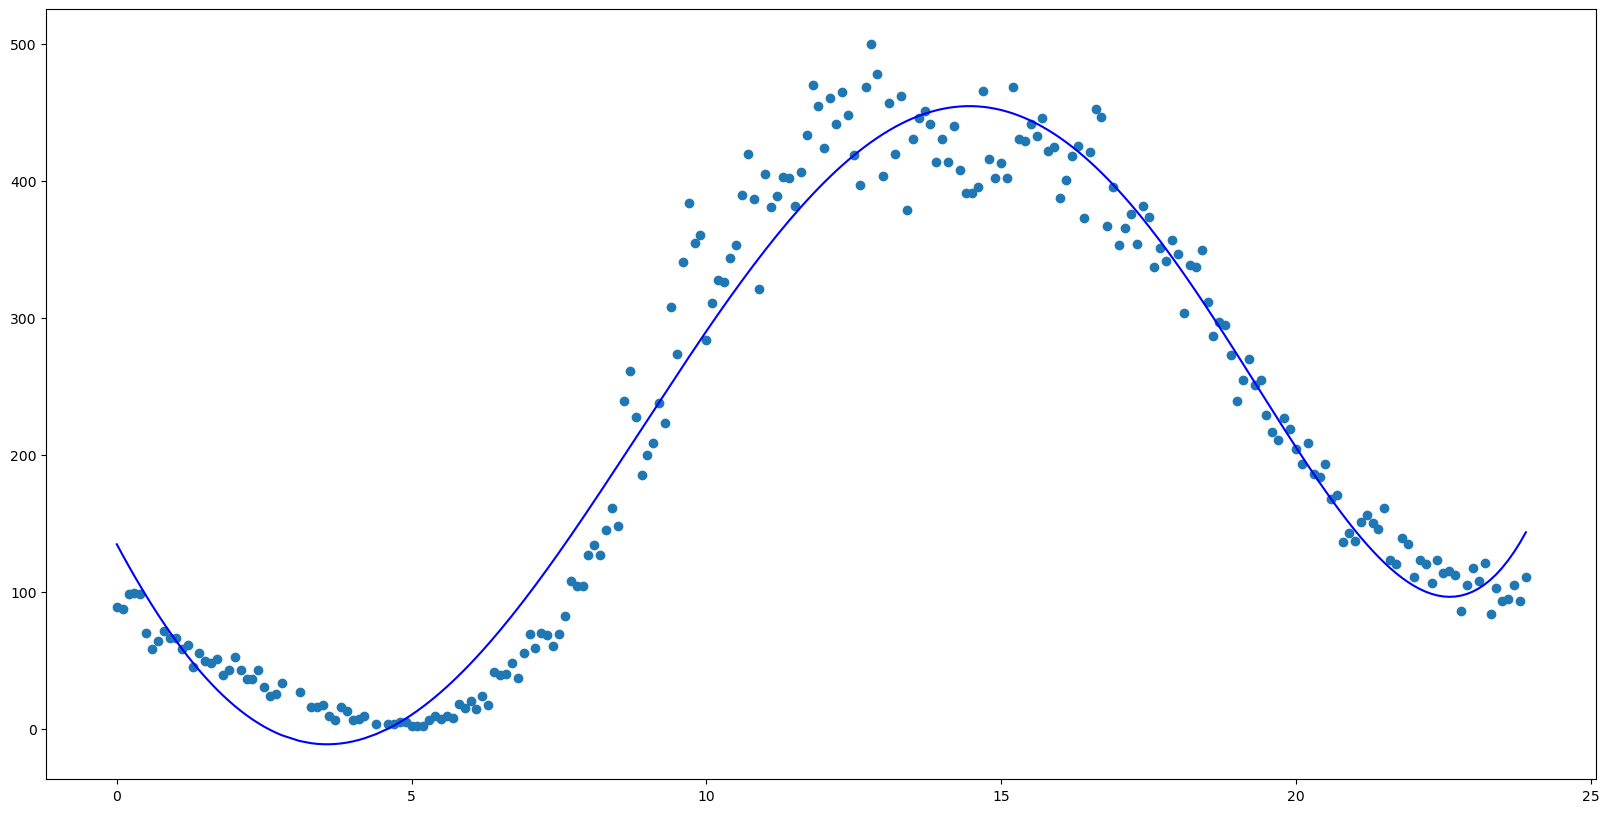

In [72]:
plt.scatter(x, y)
plt.plot(x, linear5.predict(x_5), c='b')

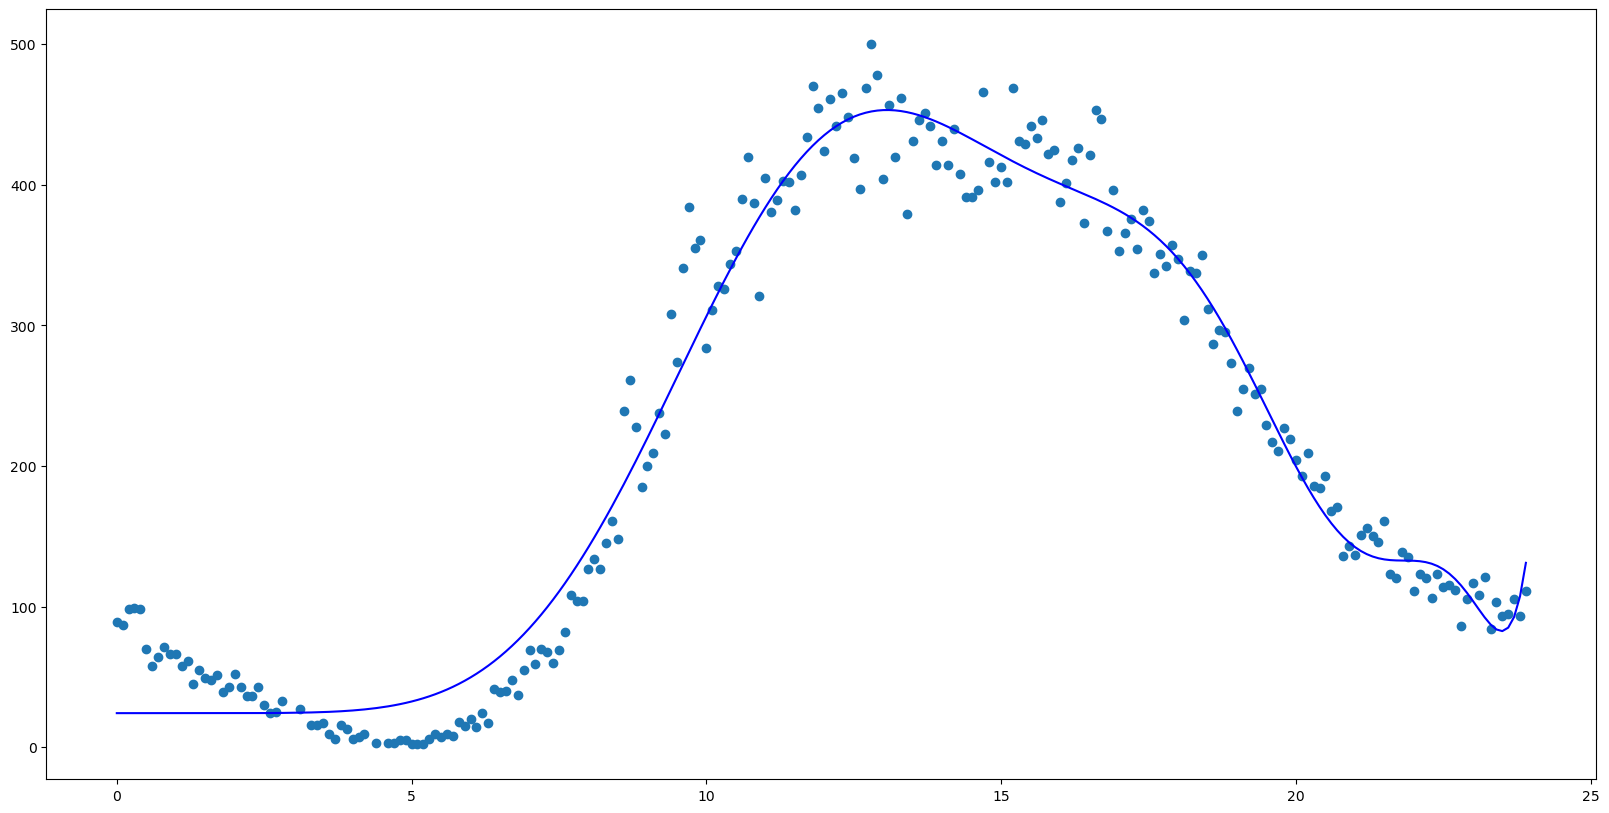

In [74]:
plt.scatter(x, y)
plt.plot(x, linear15.predict(x_15), c='b')

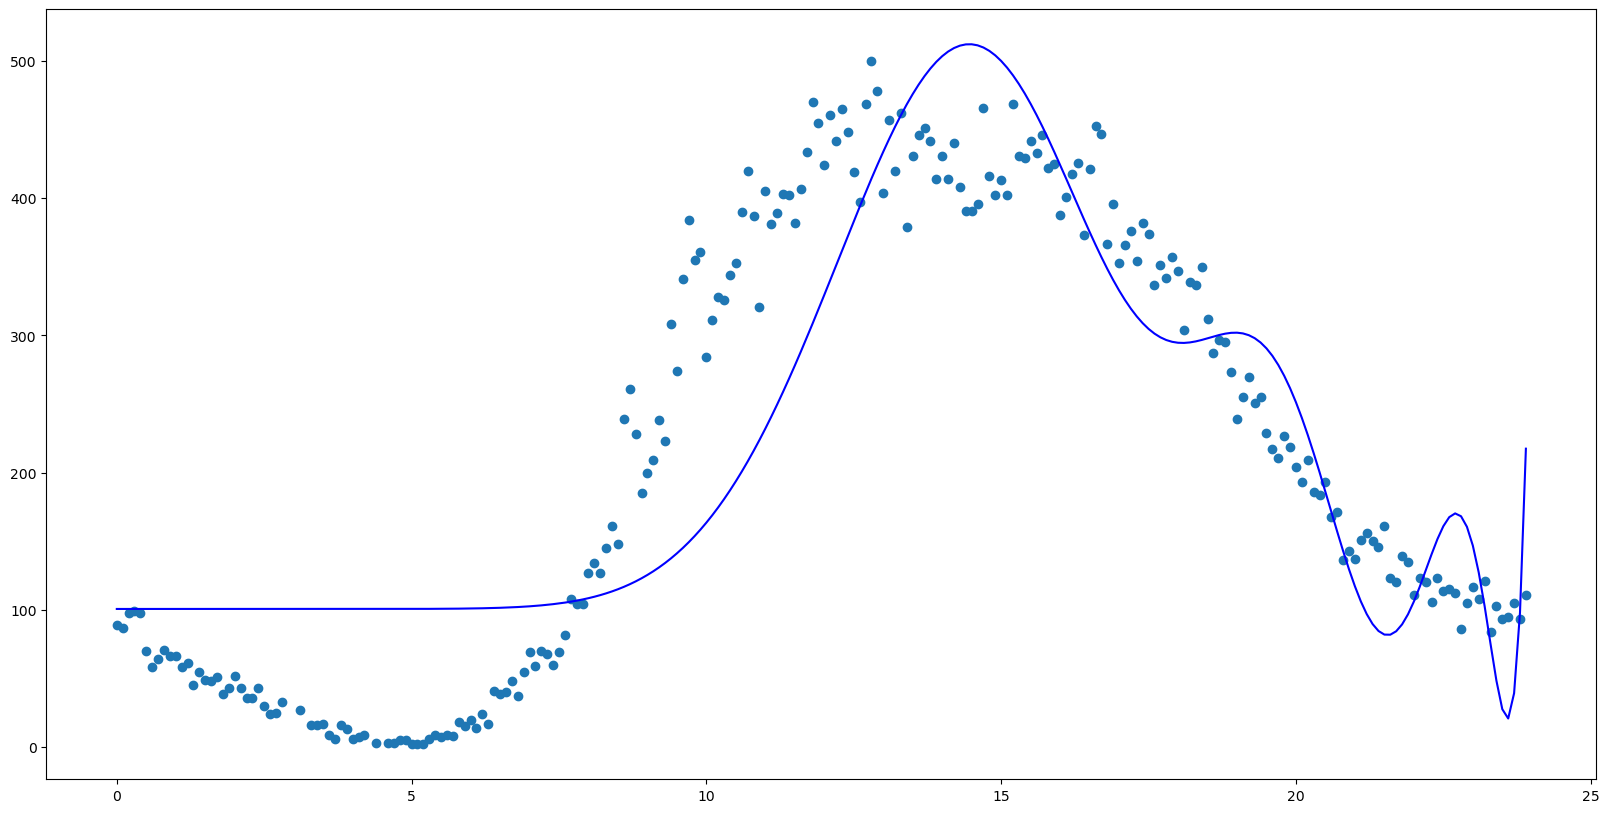

In [76]:
plt.scatter(x, y)
plt.plot(x, linear20.predict(x_20), c='b')

## 3. Using the best `monday` model's prediction, determine the errors (MSE, MAE, MAPE) between the prediction with the `monday` and `tuesday` datasets

## Repeat for `saturday`/`sunday`


In [115]:
#Monday/Tuesday
n = 50
x = monday['hour'].values
y = monday['monday'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

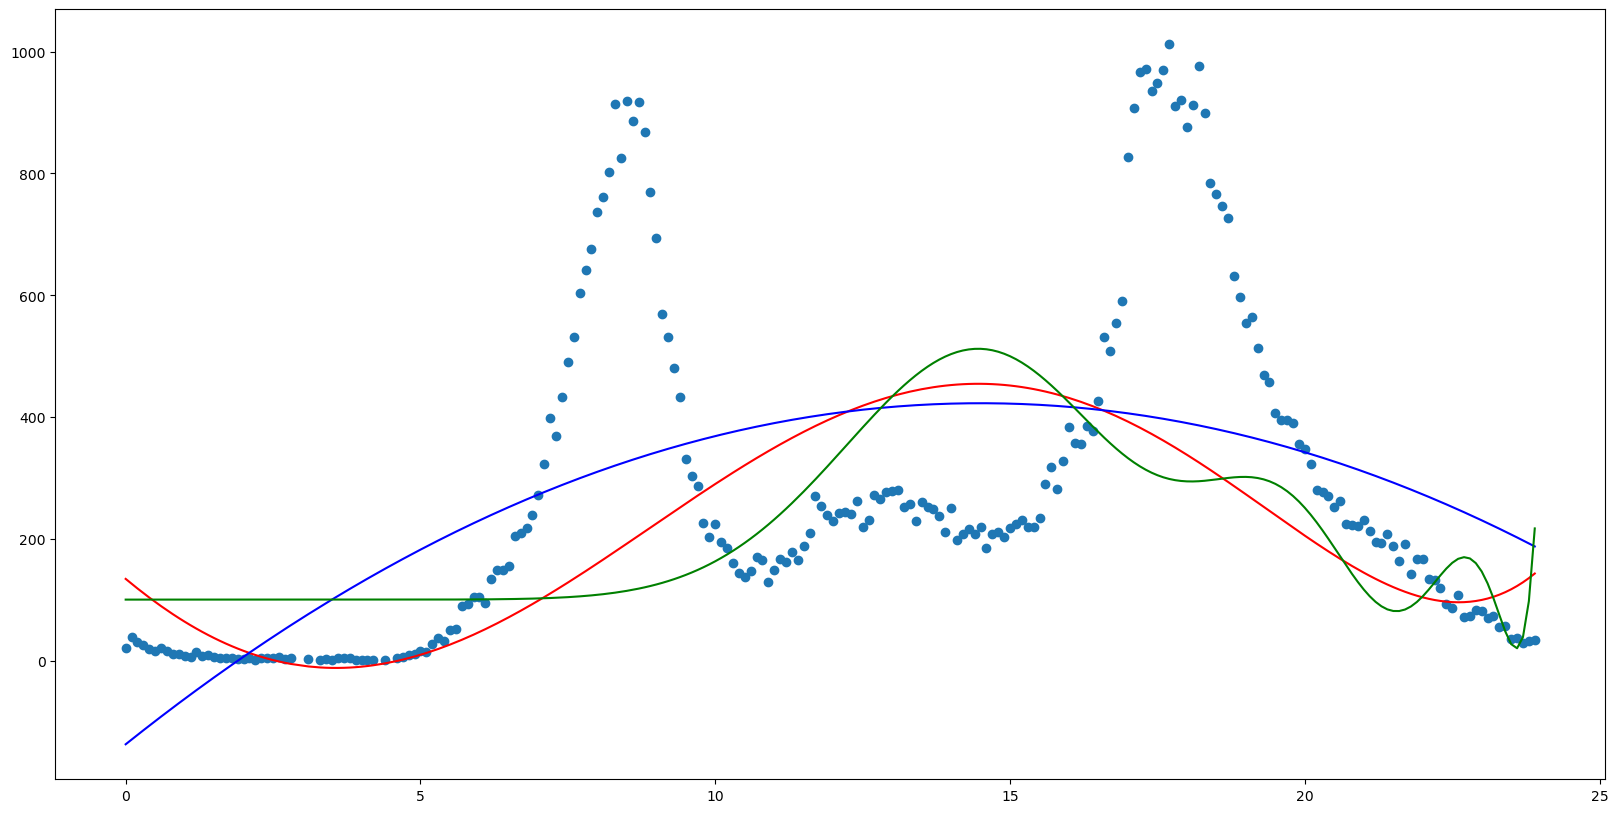

In [123]:
x_15 = PolynomialFeatures(degree=2).fit_transform(x)

linear15 = linear_model.LinearRegression().fit(x_15[:-4], y[:-4])

plt.scatter(x,y)
plt.plot(x, linear5.predict(x_5), c='r')
plt.plot(x, linear15.predict(x_15), c='b')
plt.plot(x, linear20.predict(x_20), c='g')

In [129]:
(
metrics.mean_squared_error(y[-4:], linear15.predict(x_15[-4:])),
metrics.mean_absolute_error(y[-4:], linear15.predict(x_15[-4:])),
metrics.mean_absolute_percentage_error(y[-4:], linear15.predict(x_15[-4:]))
)


(26206.23449528423, 161.7930010693937, 4.8599698925415495)

In [131]:
#Saturday/Sunday
n = 50
x = saturday['hour'].values
y = saturday['saturday'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

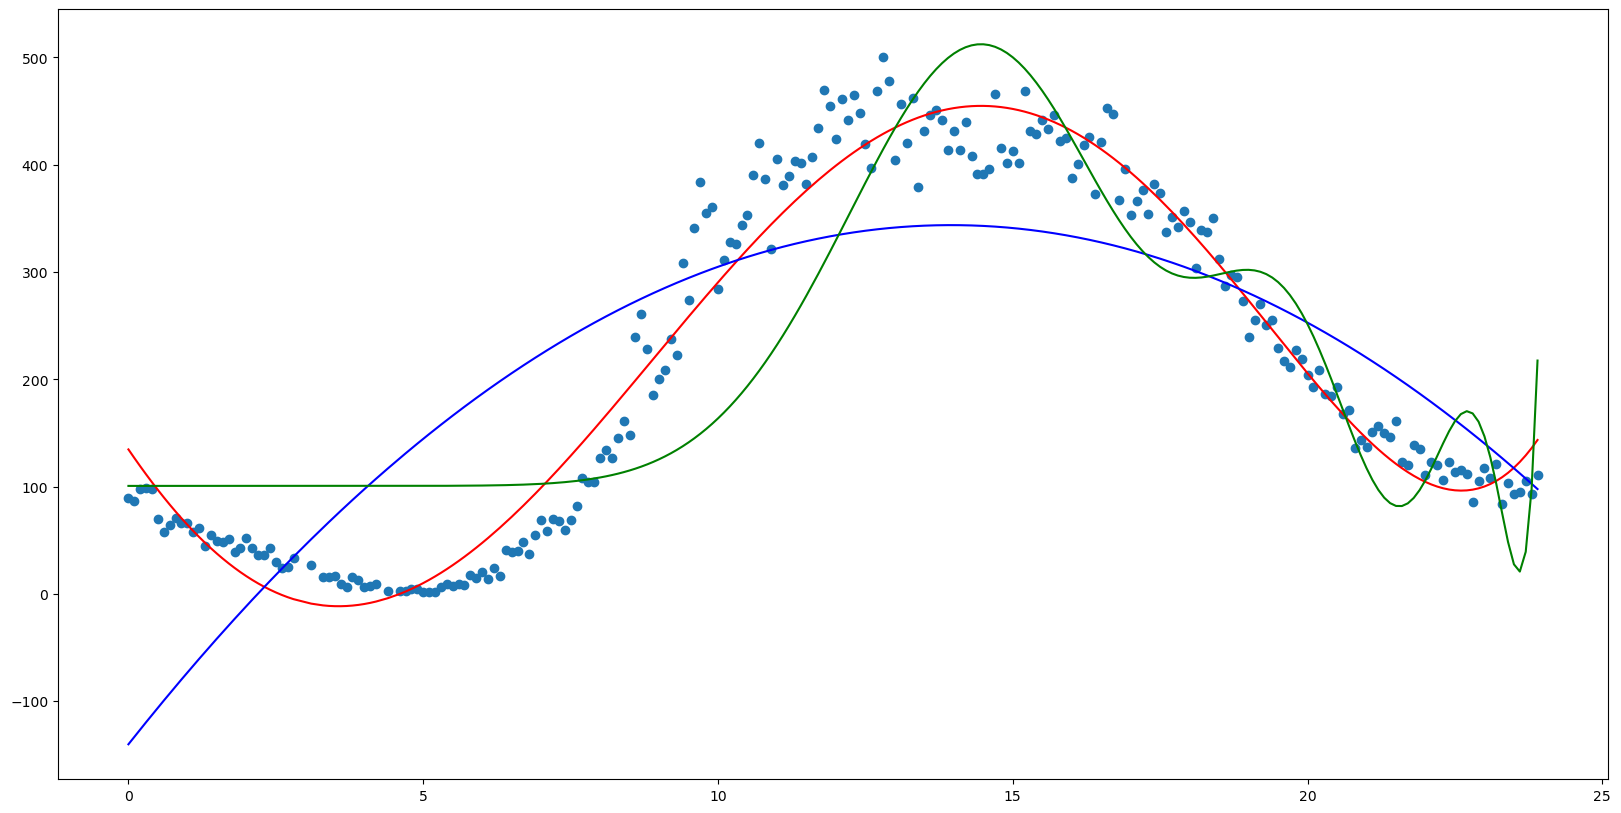

In [133]:
x_15 = PolynomialFeatures(degree=2).fit_transform(x)

linear15 = linear_model.LinearRegression().fit(x_15[:-4], y[:-4])

plt.scatter(x,y)
plt.plot(x, linear5.predict(x_5), c='r')
plt.plot(x, linear15.predict(x_15), c='b')
plt.plot(x, linear20.predict(x_20), c='g')

In [135]:
(
metrics.mean_squared_error(y[-4:], linear15.predict(x_15[-4:])),
metrics.mean_absolute_error(y[-4:], linear15.predict(x_15[-4:])),
metrics.mean_absolute_percentage_error(y[-4:], linear15.predict(x_15[-4:]))
)

(143.791777798967, 10.677904122674434, 0.10727283880319574)

## 4. With `saturday`, use `train_test_split` to create training and test sets and build a model. Create predictions using the xtest from and determine the errors between these predictions and the ytest (MSE, MAE, MAPE).

## repeat for `monday`

In [ ]:
#saturday

In [ ]:
n = 50
x = saturday['hour'].values
y = saturday['saturday'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [79]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
linear = linear_model.LinearRegression().fit(xtrain, ytrain)

In [81]:
xtrain2 = PolynomialFeatures(degree=2).fit_transform(xtrain)
xtest2 = PolynomialFeatures(degree=2).fit_transform(xtest)
linear2 = linear_model.LinearRegression().fit(xtrain2, ytrain)

In [83]:
xtrain10 = PolynomialFeatures(degree=10).fit_transform(xtrain)
xtest10 = PolynomialFeatures(degree=10).fit_transform(xtest)
linear10 = linear_model.LinearRegression().fit(xtrain10, ytrain)

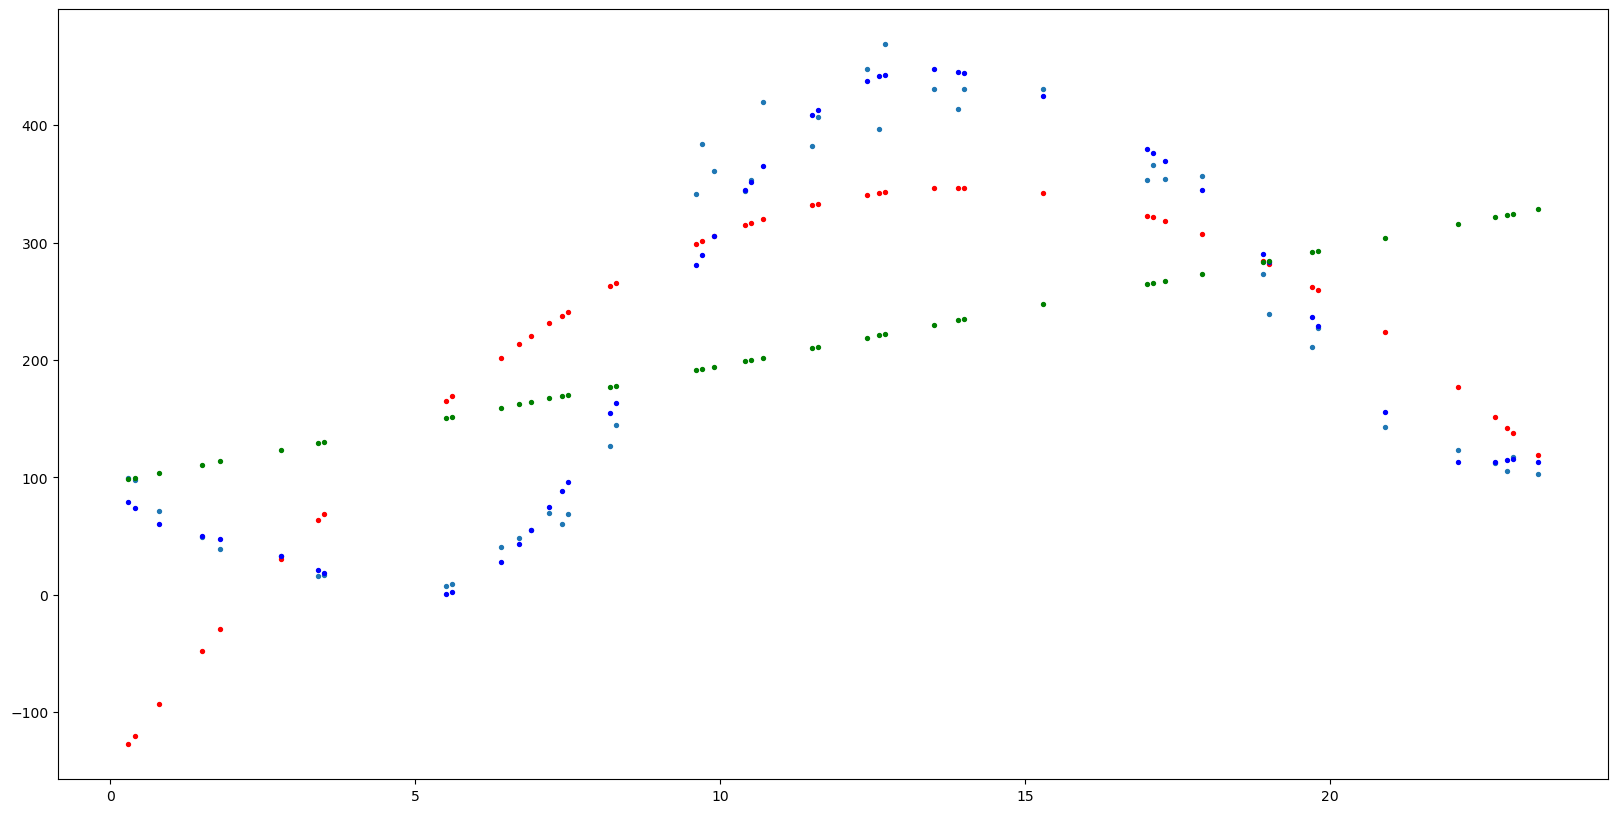

In [85]:
size = 8
plt.scatter(xtest, ytest, s=size)
plt.scatter(xtest, linear2.predict(xtest2), c='r', s=size)
plt.scatter(xtest, linear10.predict(xtest10), c='b', s=size)
plt.scatter(xtest, linear.predict(xtest), c='g', s=size)

In [87]:
(
    metrics.mean_squared_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_squared_error(ytest, linear.predict(xtest)),
    metrics.mean_squared_error(ytest, linear2.predict(xtest2))
)

(692.5094610244397, 21045.925798888376, 10869.769569838238)

In [89]:
(
    metrics.mean_absolute_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_absolute_error(ytest, linear.predict(xtest)),
    metrics.mean_absolute_error(ytest, linear2.predict(xtest2))
)

(18.227693916345075, 129.48977407286762, 86.87040806879763)

In [91]:
(
    metrics.mean_absolute_percentage_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_absolute_percentage_error(ytest, linear.predict(xtest)),
    metrics.mean_absolute_percentage_error(ytest, linear2.predict(xtest2))
)

(0.1400449263054141, 1.8826382219879725, 1.7634853077925974)

In [ ]:
#monday

In [93]:
n = 50
x = monday['hour'].values
y = monday['monday'].values

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [95]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)
linear = linear_model.LinearRegression().fit(xtrain, ytrain)

In [97]:
xtrain2 = PolynomialFeatures(degree=2).fit_transform(xtrain)
xtest2 = PolynomialFeatures(degree=2).fit_transform(xtest)
linear2 = linear_model.LinearRegression().fit(xtrain2, ytrain)

In [99]:
xtrain10 = PolynomialFeatures(degree=10).fit_transform(xtrain)
xtest10 = PolynomialFeatures(degree=10).fit_transform(xtest)
linear10 = linear_model.LinearRegression().fit(xtrain10, ytrain)

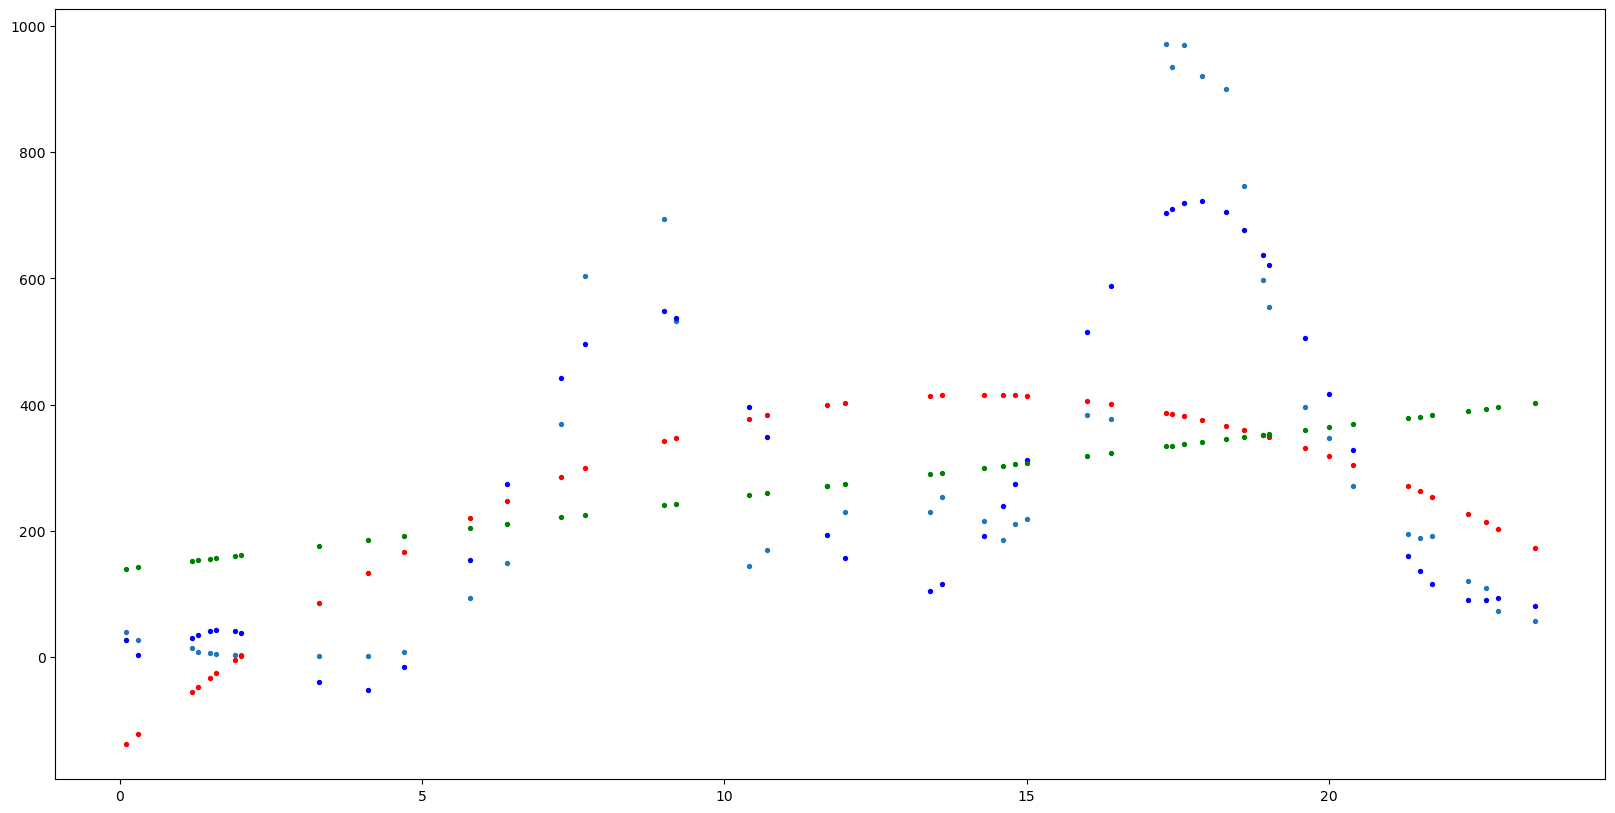

In [101]:
size = 8
plt.scatter(xtest, ytest, s=size)
plt.scatter(xtest, linear2.predict(xtest2), c='r', s=size)
plt.scatter(xtest, linear10.predict(xtest10), c='b', s=size)
plt.scatter(xtest, linear.predict(xtest), c='g', s=size)

In [103]:
(
    metrics.mean_squared_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_squared_error(ytest, linear.predict(xtest)),
    metrics.mean_squared_error(ytest, linear2.predict(xtest2))
)

(12667.695863339188, 71674.32047968346, 56902.37770088219)

In [105]:
(
    metrics.mean_absolute_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_absolute_error(ytest, linear.predict(xtest)),
    metrics.mean_absolute_error(ytest, linear2.predict(xtest2))
)

(86.92027826488788, 207.34595309124168, 179.96316805400375)

In [107]:
(
    metrics.mean_absolute_percentage_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_absolute_percentage_error(ytest, linear.predict(xtest)),
    metrics.mean_absolute_percentage_error(ytest, linear2.predict(xtest2))
)

(2.3284368298385423, 9.355058052383505, 4.128645899194121)